In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import iqr

In [2]:
df = pd.read_csv("../Dataset/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data_x = df.drop(columns="Outcome")
data_y = df["Outcome"]
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2)

### KNeighbors

In [4]:
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)

KNeighborsClassifier()

In [5]:
y_pred = knn.predict(test_x)

In [6]:
accuracy = knn.score(test_x, test_y)
accuracy

0.7077922077922078

### SVM

In [7]:
svm_model = SVC()
svm_model.fit(train_x, train_y)
y_pred = svm_model.predict(test_x)
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7467532467532467


### Decision Tree

In [8]:
d_tree = DecisionTreeClassifier()
d_tree.fit(train_x, train_y) 
y_pred = d_tree.predict(test_x)
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6558441558441559


### Capping 

In [9]:
df2 = df.copy()
for col in df.columns:

    iqr_ = iqr(df[col])
    q1 = np.percentile(df[col], 25)
    q2 = np.percentile(df[col], 75)

    lb = q1 - 1.5*iqr_
    ub = q2 - + 1.5*iqr_

    df2[col] = np.where(df[col]<=lb, lb, 
           np.where(df[col] >=ub, ub, df[col]) 
            )
    
    

In [10]:
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-1.5,78.375,53.0,-16.0,-63.625,22.65,0.0525,15.5,-0.5
1,-1.5,78.375,53.0,-16.0,-63.625,22.65,0.0525,15.5,-0.5
2,-1.5,78.375,53.0,-16.0,-63.625,22.65,0.0525,15.5,-0.5
3,-1.5,78.375,53.0,-16.0,-63.625,22.65,0.0525,15.5,-0.5
4,-1.5,78.375,40.0,-16.0,-63.625,22.65,0.0525,15.5,-0.5
...,...,...,...,...,...,...,...,...,...
763,-1.5,78.375,53.0,-16.0,-63.625,22.65,0.0525,15.5,-0.5
764,-1.5,78.375,53.0,-16.0,-63.625,22.65,0.0525,15.5,-0.5
765,-1.5,78.375,53.0,-16.0,-63.625,22.65,0.0525,15.5,-0.5
766,-1.5,78.375,53.0,-16.0,-63.625,22.65,0.0525,15.5,-0.5


### Scalling the dataset

In [11]:
data_x = df2.drop(columns="Outcome")
data_y = df2["Outcome"]
scaler_standard = StandardScaler()
scaler_standard.set_output(transform="pandas")
scaled_data_standard = scaler_standard.fit_transform(data_x)

In [12]:
scaled_data_standard.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.0,0.155344,0.270478,0.0,0.0,0.19693,0.0,0.0
1,0.0,0.155344,0.270478,0.0,0.0,0.19693,0.0,0.0
2,0.0,0.155344,0.270478,0.0,0.0,0.19693,0.0,0.0
3,0.0,0.155344,0.270478,0.0,0.0,0.19693,0.0,0.0
4,0.0,0.155344,-2.955873,0.0,0.0,0.19693,0.0,0.0


### Decision tree with hyper tuning

In [13]:
d_tree = DecisionTreeClassifier()

In [14]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2,4,6, ],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2,4,6, 8],
}

In [15]:
grid_search = GridSearchCV(estimator=d_tree, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=4)
grid_search.fit(train_x, train_y)
print("Best parameters found:", grid_search.best_params_)
best_d_tree = grid_search.best_estimator_
y_pred = best_d_tree.predict(test_x)
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy score:", accuracy)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters found: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy score: 0.6948051948051948


### Random forest 

In [16]:
random_forest = RandomForestClassifier(n_estimators=400, criterion="gini", max_depth=2, min_samples_leaf=2, min_samples_split=2)
random_forest.fit(train_x, train_y)
y_pred = random_forest.predict(test_x)
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy score:", accuracy)

Accuracy score: 0.7402597402597403


In [17]:
import itertools

In [18]:
combinations = list(itertools.combinations(data_x.columns, 2))

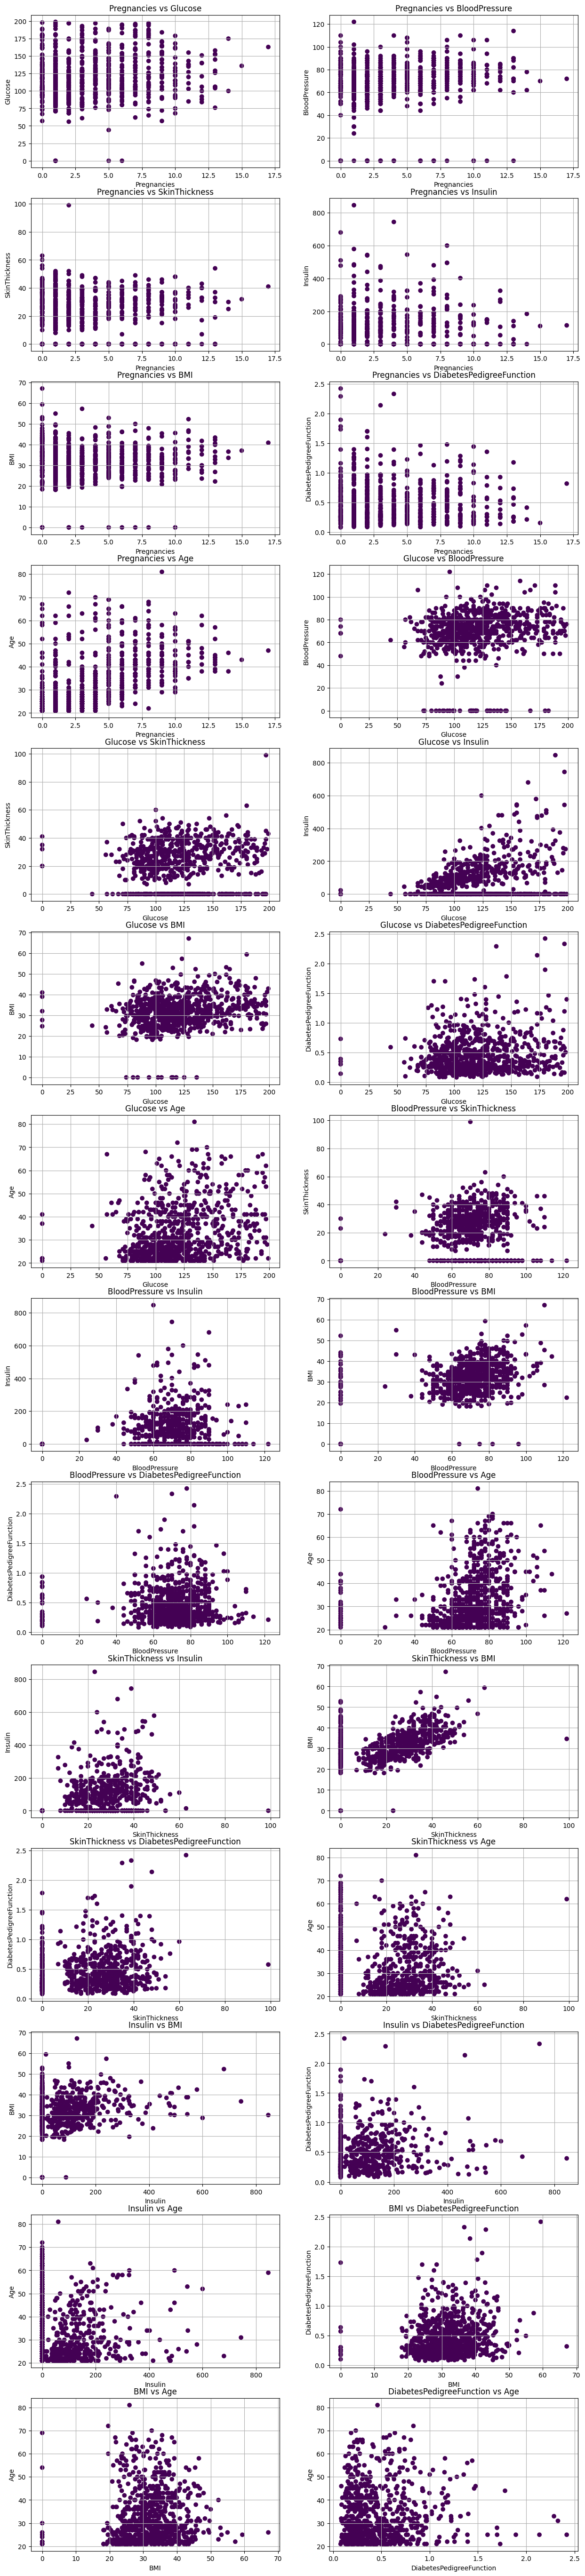

In [19]:
num_plots = len(combinations)
num_cols = 2  
num_rows = -(-num_plots // num_cols) 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for combo, ax in zip(combinations, axes.flat):
    column1, column2 = combo
    # Scatter plot
    ax.scatter(df[column1], df[column2], c=data_y, cmap=plt.cm.viridis)
    ax.set_title(f'{column1} vs {column2}')
    ax.set_xlabel(column1)
    ax.set_ylabel(column2)
    ax.grid(True)

### KNN with hyper tuning and scaling data

In [20]:
train_x, test_x, train_y, test_y = train_test_split(scaled_data_standard, data_y, test_size=0.2)
param_grid = {
    'n_neighbors': [5, 7, 9, 11, 13, 15], 
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'leaf_size': [40,50,60]
}

In [21]:
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=4)
grid_search.fit(train_x, train_y)
print("Best parameters found:", grid_search.best_params_)
best_d_tree = grid_search.best_estimator_
y_pred = best_d_tree.predict(test_x)
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy score:", accuracy)

ValueError: 
All the 540 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py", line 233, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py", line 480, in _fit
    check_classification_targets(y)
  File "C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\multiclass.py", line 216, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


### SVM Model with hyper tuning

In [22]:
param_grid = {
    'C': [0.01, 0.1, 1, 5, 10, 15], 
    'gamma': ['scale', 'auto'], 
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=4)
grid_search.fit(train_x, train_y)
print("Best parameters found:", grid_search.best_params_)
best_d_tree = grid_search.best_estimator_
y_pred = best_d_tree.predict(test_x)
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy score:", accuracy)

ValueError: 
All the 240 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py", line 199, in fit
    y = self._validate_targets(y)
        ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py", line 743, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\multiclass.py", line 216, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.
